#Setup môi trường trên Google Colab

In [ ]:
# Check GPU
!nvidia-smi

Fri Jun 25 14:59:40 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

#Import thư viện

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import time
import random

#Import dataset



In [ ]:
# mount tới drive để lấy data trong drive, không phải tải dữ liệu nhiều lần lên colab (vì cứ 10-12 tiếng là colab sẽ reset nên sẽ mất hết dữ liệu)
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# dataset = pd.read_csv('/content/drive/MyDrive/TÀI LIỆU HỌC TẬP ĐẠI HỌC 2019-2023/NĂM 2 2020 - 2021/HỌC KÌ 2 2020 - 2021/HỌC MÁY THỐNG KÊ DS102.L21/ĐỒ ÁN CUỐI KỲ/Credit-card-dataset/creditcard.csv', na_values=['?','--'])
dataset = pd.read_csv('/content/drive/MyDrive/Trần Triệu Vũ/creditcard.csv', na_values=['?','--'])
dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


#Phân tích và Tiền xử lý dữ liệu

##Phân tích dữ liệu

###Xem thông tin của dataset

In [ ]:
# Xem chi tiết về dữ liệu
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,3.919560e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.688174e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.769071e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.782312e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,-1.552563e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,2.010663e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-1.694249e-15,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,-1.927028e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-3.137024e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [ ]:
# Check info dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

**Nhận Xét**: 
+ Có tất cả 30 features và 1 Outcome (**Class**)
+ Không có kiểu dữ liệu object

###Check missing data

In [ ]:
# Kiểm tra xem có dữ liệu nào bị thiếu không
total = dataset.isnull().sum().sort_values(ascending = False)
percent = (dataset.isnull().sum()/dataset.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,Class,V14,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V15,Amount,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Time
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


 **Nhận Xét**: Không có dữ liệu nào bị thiếu trong toàn bộ tập dữ liệu

###Xem tương quan giữa 2 lớp

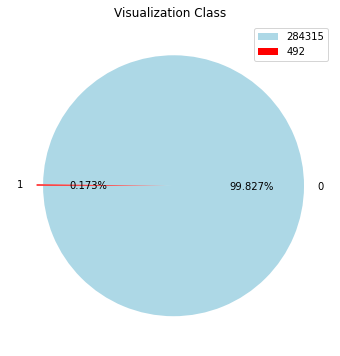

In [ ]:
# Xem tương quan giữa 2 lớp bằng biểu đồ tròn
plt.figure(figsize=(12,6))
plt.title("Visualization Class")
g = plt.pie(dataset.Class.value_counts(),explode=(0.025,0.025), 
            labels=dataset.Class.value_counts().index, 
            colors=['lightblue', 'red'],autopct='%.3f%%', startangle=180)
plt.legend(dataset.Class.value_counts())
plt.show()

**Nhận Xét**:
+ Dataset bị mất cân bằng dữ liệu
+ Class 0 chiếm 99.827% (284315) trong khi đó Class 1 chỉ chiếm 0.173% (492)

**Biện Pháp**: Sử dụng các phương pháp cân bằng dữ liệu
+ Undersampling
+ Oversampling
+ SMOTE

###Features Plot

<Figure size 432x288 with 0 Axes>

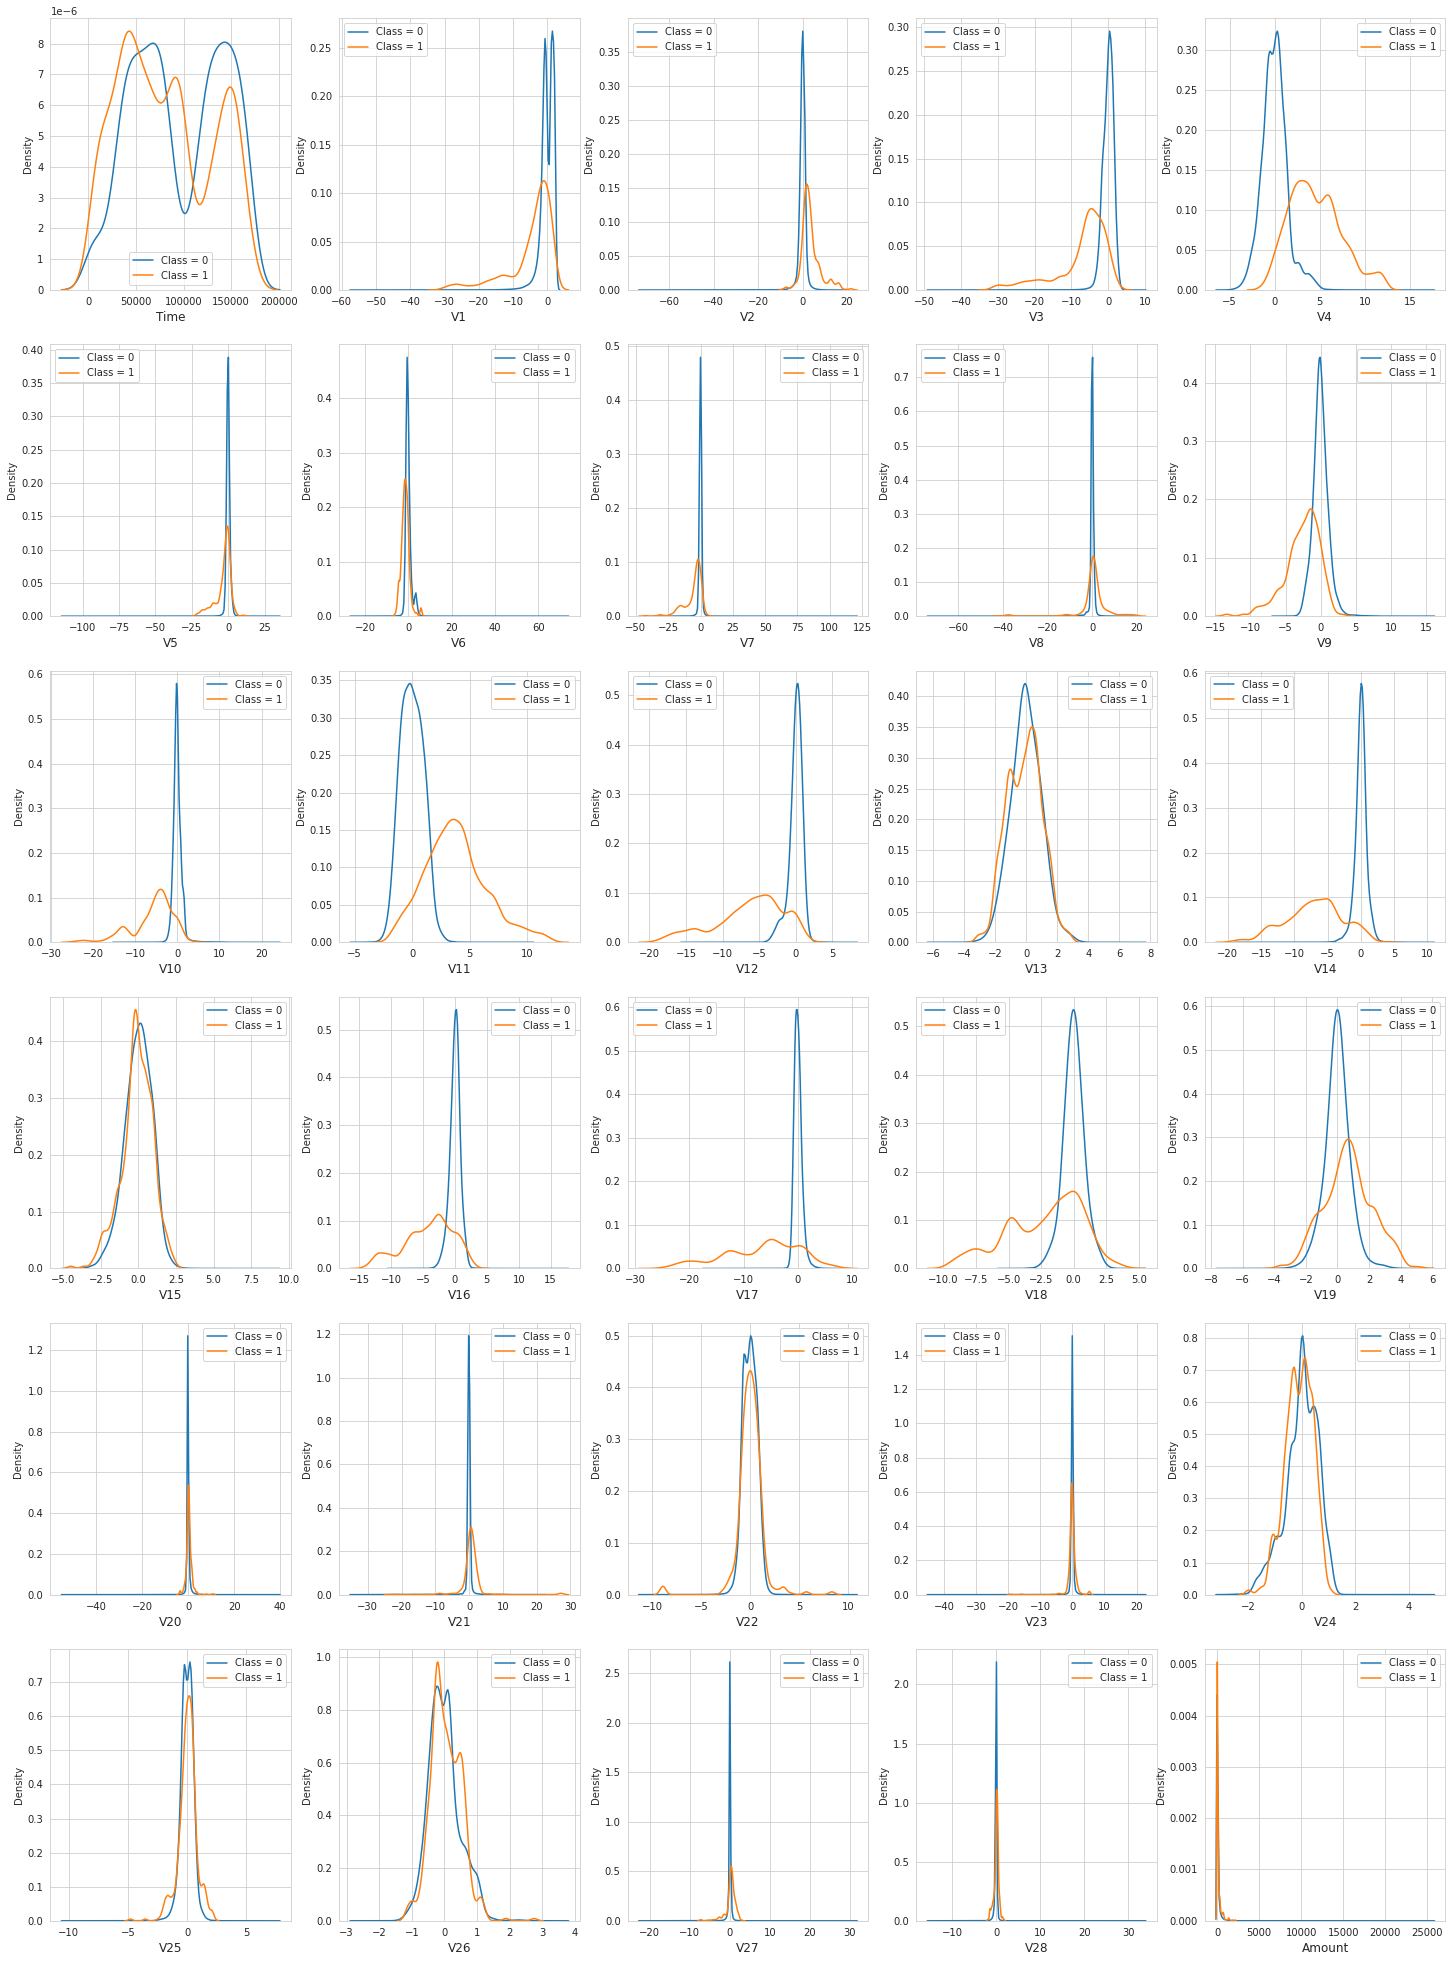

In [ ]:
# Tạo 1 dataframe mới gồm có 30 đặc trưng.
df1 = dataset[dataset.columns[:-1]]

# Lấy danh sách các cột của df1
columns = df1.columns.values

# Tách dữ liệu tương ứng với class 0 và 1 và gán lần lượt vào 2 đối tượng a và b
i = 0
a = dataset.loc[dataset['Class'] == 0]
b = dataset.loc[dataset['Class'] == 1]

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(6,5,figsize=(25,35))
# Vẽ biểu đồ sự tương quan giữa class 0,1 với từng thuộc tính
for j in columns:
    i += 1
    plt.subplot(6,5,i)
    sns.kdeplot(a[j], bw_method=0.2,label="Class = 0")
    sns.kdeplot(b[j], bw_method=0.2,label="Class = 1")
    plt.xlabel(j, fontsize=12)
    plt.legend(loc='best')
plt.show()

##Tiền xử lý dữ liệu

In [ ]:
# Lấy dữ liệu và nhãn tương ứng
X = dataset.iloc[:, :-1].values
Y = dataset.iloc[:, -1].values
# Chia dữ liệu trainset, testset lần lượt vào các đối tượng X_train, X_test, Y_train, Y_test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, random_state = 0)

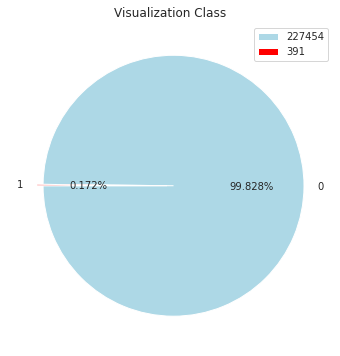

In [ ]:
# Xem tương quan giữa 2 lớp trong tập train bằng biểu đồ tròn
plt.figure(figsize=(12,6))
plt.title("Visualization Class")
g = plt.pie(pd.DataFrame(Y_train).value_counts(),
            explode=(0.025,0.025), startangle=180, 
            labels=dataset.Class.value_counts().index, 
            colors=['lightblue', 'red'], autopct='%.3f%%')
plt.legend(pd.DataFrame(Y_train).value_counts())
plt.show()

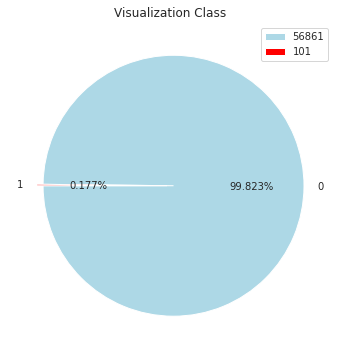

In [ ]:
# Xem tương quan giữa 2 lớp trong tập test bằng biểu đồ tròn
plt.figure(figsize=(12,6))
plt.title("Visualization Class")
g = plt.pie(pd.DataFrame(Y_test).value_counts(),
            explode=(0.025,0.025), startangle=180, 
            labels=dataset.Class.value_counts().index, 
            colors=['lightblue', 'red'], autopct='%.3f%%')
plt.legend(pd.DataFrame(Y_test).value_counts())
plt.show()

### Xử mất cân bằng dữ liệu

####Sử dụng kỹ thuật Undersampling


In [ ]:
# Sử dụng udersampling với tỉ lệ class 1 - class 0 là 30 - 70
RUS =  RandomUnderSampler(sampling_strategy= 3/7, random_state = 42)
X_RUS, Y_RUS = RUS.fit_resample(X_train, Y_train)

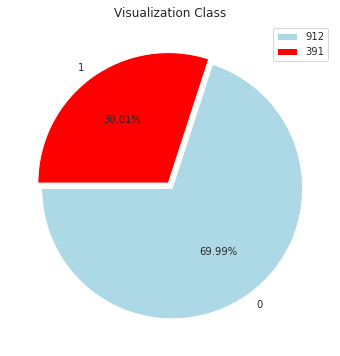

In [ ]:
# Xem tương quan giữa 2 lớp trong tập train bằng biểu đồ tròn sau khi cân bằng dữ liệu với Undersampling
plt.figure(figsize=(12,6))
plt.title("Visualization Class")
g = plt.pie(pd.DataFrame(Y_RUS).value_counts(),explode=(0.025,0.025),
            labels=dataset.Class.value_counts().index, 
            colors=['lightblue', 'red'], autopct='%.2f%%', startangle=180)
plt.legend(pd.DataFrame(Y_RUS).value_counts())
plt.show()

##Feature Scaling

In [ ]:
SC = StandardScaler()
# Chuẩn hóa dữ liệu train
X_train_sc = SC.fit_transform(X_RUS)
# Chuẩn hóa dữ liệu test
X_test_sc = SC.fit_transform(X_test)

#Modeling

## Logistic Regression


Sau quá trình test thử các cách chia tỷ lệ class 0 - class 1 và điểu chỉnh các tham số của mô hình thì ta chọn ra được tham số C = 0.06, và tỷ lệ class 1 - class 0 là 30-70 cho kết quả tốt nhất.

In [ ]:
time_star = time.time() # Bắt đầu ghi thời gian
# Train model
model_LR = LogisticRegression(max_iter=500, C = 0.045)
model_LR.fit(X_train_sc, Y_RUS)
# Đánh giá mô hình thông qua confusion matrix
cm_train = confusion_matrix(Y_RUS, model_LR.predict(X_train_sc))
cm_test = confusion_matrix(Y_test, model_LR.predict(X_test_sc))
# Đánh giá mô hình thông qua độ đo ROC_AUC
model_roc_auc_score_train = roc_auc_score(Y_RUS, model_LR.predict_proba(X_train_sc)[:, 1])
model_roc_auc_score_test = roc_auc_score(Y_test, model_LR.predict_proba(X_test_sc)[:, 1])
time_end = time.time() # Dừng ghi thời gian
# Thời gian để học và đánh giá mô hình
TIME = (time_end - time_star)
# In các kết quả ra màn hình
print('Logistic Regression with Undersampling:')
print('Confustion Matrix Train: \n{}'.format(cm_train))
print('Confustion Matrix Test: \n{}'.format(cm_test))
print('ROC AUC score Train: {}, ROC AUC score Test: {}'.format(model_roc_auc_score_train, model_roc_auc_score_test))
print('Time: {} seconds\n'.format(TIME))

Logistic Regression with Undersampling:
Confustion Matrix Train: 
[[911   1]
 [ 57 334]]
Confustion Matrix Test: 
[[38313 18548]
 [    1   100]]
ROC AUC score Train: 0.9831656346749226, ROC AUC score Test: 0.9828264548549084
Time: 0.11944127082824707 seconds



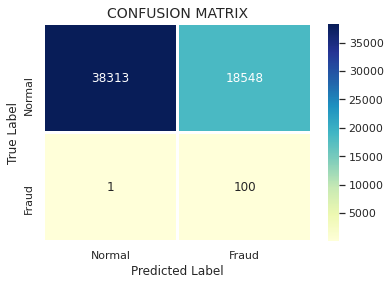

In [ ]:
# Trực quan hóa Confusion matrix
array = [[38313, 18548],
         [1, 100]]
df_cm = pd.DataFrame(array, range(2), range(2))
sns.set(font_scale=1.0)
sns.heatmap(df_cm, annot=True, linewidths=2, linecolor='white', fmt='d',
            cmap="YlGnBu", xticklabels=['Normal', 'Fraud'],
            yticklabels=['Normal', 'Fraud'])
plt.title('CONFUSION MATRIX', fontsize = 14)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
# Kiểm tra kết quả dự đoán 1 điểm dữ liệu ngẫu nhiên trong tập test của mô hình
id = random.randint(0,len(Y_test))
print('Values of datapoint with id =',id,':\n',X_test_sc[id])
print('Predicted Label: ', model_LR.predict(X_test_sc)[id])
print('True Label: ', Y_test[id])

Values of datapoint with id = 20304 :
 [-0.53550791 -0.36227745  0.51362006  0.42335733  0.25588426  0.01226353
 -1.05505117  0.37498685  0.16713322 -0.50141321 -0.62992209 -0.51431951
  0.5066913   0.45422255  0.52460834  0.056461    0.23535869 -0.58742046
 -0.02888579 -1.46318169 -0.2346325   0.60172748  1.45432992  0.07970005
  1.20642064 -1.42069371 -1.22262834  0.27051613  0.3457559  -0.26029007]
Predicted Label:  0
True Label:  0
